In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import fresnel

In [2]:
# photon energy 
energy = 10 # keV
wavelength = 1.2398 / (energy * 1e3) * 1e-3 # mm

nx = 10000
nz = 10000

xtot = 2000e-6

zmin = -0.5
zmax = 1 
ztot = zmax - zmin # mm


xx, dx = np.linspace(-xtot/2, xtot/2, nx, retstep=True)
zz, dz = np.linspace(zmin, zmax, nz, endpoint=False, retstep=True)


## gaussian beam, analytical solution

In [3]:
fwhm = 100e-6
w0 = fwhm / 1.177

In [4]:
def test(*u, z):

    for i, j in zip(u, z):
        print(i, j)

test(1, z=np.atleast_1d(np.asarray(2)))

1 2


Text(0.5, 1.0, 'Gaussian beam, analytical solution. w0: 85 nm')

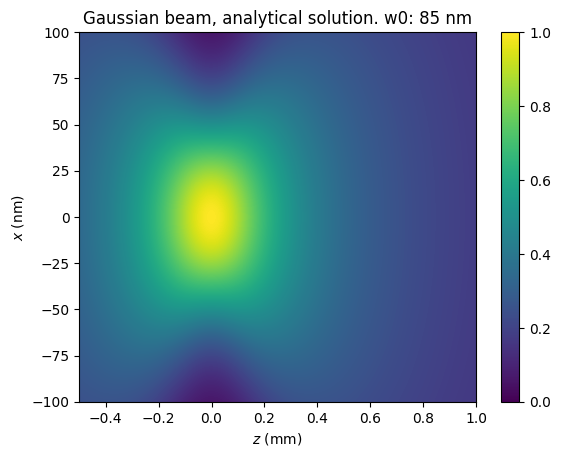

In [5]:
gauss_field = fresnel.gaussian_beam1d(w0, xx[np.newaxis,:], zz[:,np.newaxis], wavelength)
result = gauss_field.transpose()

fig, ax = plt.subplots()

im = ax.imshow(np.abs(result)**2, 
               aspect='auto', 
               #cmap=plt.get_cmap('bwr'), 
               extent=[zmin, zmax, -xtot/2 *1e6, xtot/2 * 1e6]
              )
im.set_clim(0, 1)
ax.set_ylim(-100,100)
fig.colorbar(im)
ax.set_xlabel(r'$z$ (mm)')
ax.set_ylabel(r'$x$ (nm)')
ax.set_title(f'Gaussian beam, analytical solution. w0: {w0 * 1e6:.0f} nm')

In [6]:
# gaussian beam

u0 = fresnel.gaussian_beam1d(w0, xx, z=-0.5, wavelength=wavelength)

pml_width = 200

field = np.zeros((nz, nx), dtype=np.complex128)

refractive_index = np.ones_like(u0)
propagator = fresnel.FDPropagator2d(refractive_index, u0, dz / wavelength, dx / wavelength, pml_width, sigma_max=0.1)

field[0,...] = u0

for iz in tqdm(range(1, nz)):
    boundary = 0+0j
    field[iz, ...] = propagator.step(refractive_index, (boundary, boundary))
    
result_empty = field.transpose()


100%|███████████████████████████████████████████████████████████████████████████| 9999/9999 [00:07<00:00, 1346.80it/s]


Text(0.5, 1.0, 'Gaussian beam, analytical solution. w0: 85 nm')

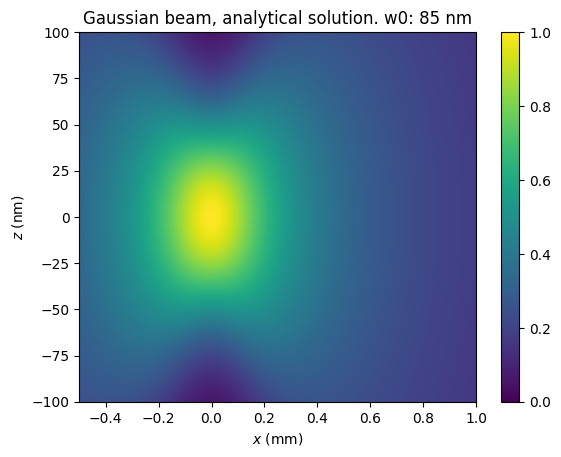

In [7]:
fig, ax = plt.subplots()

im = ax.imshow(np.abs(result_empty)**2, 
               aspect='auto', 
               #cmap=plt.get_cmap('jet'), 
               extent=[zmin, zmax, -xtot/2 *1e6, xtot/2 * 1e6],
               rasterized=True,
              )
im.set_clim(0, 1)
ax.set_ylim(-100,100)
fig.colorbar(im)
ax.set_xlabel(r'$x$ (mm)')
ax.set_ylabel(r'$z$ (nm)')
ax.set_title(f'Gaussian beam, analytical solution. w0: {w0 * 1e6:.0f} nm')